# <b> Лабораторна робота №3
"Дерева прийняття рішень"\
Виконала: Челюскіна Юлія КМ-21 (2-га підгрупа)

---

## Початкові дані (1-3)

In [76]:
import pandas as pd
df  = pd.read_csv("ЛР3-пгр2.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [77]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1599
Number of columns: 12


In [78]:
df.iloc[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Поділ датасету (4)

In [79]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=42)

## Створення моделей (5)

In [80]:
from sklearn.tree import DecisionTreeClassifier 
depth = 5
# Створюємо модель для Gini (за замовчуванням)
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
model_gini.fit(X_train, y_train)
y_g_train = model_gini.predict(X_train)
y_g_test = model_gini.predict(X_test)

# Створюємо модель для Entropy
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
model_entropy.fit(X_train, y_train)
y_e_train = model_entropy.predict(X_train)
y_e_test = model_entropy.predict(X_test)

## Дерево рішень (gini) (6)

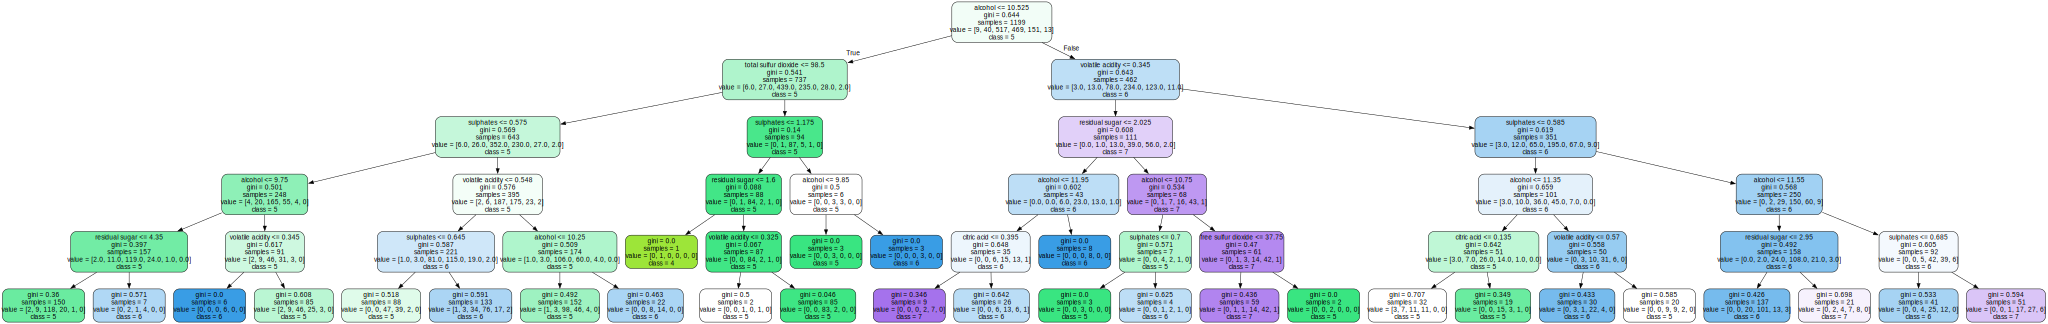

In [6]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display


# Після цього знову створюй дерево
dot_data = export_graphviz(
    model_gini,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_gini", format="png")
display(graph)


## *Дерево рішень (entropy)

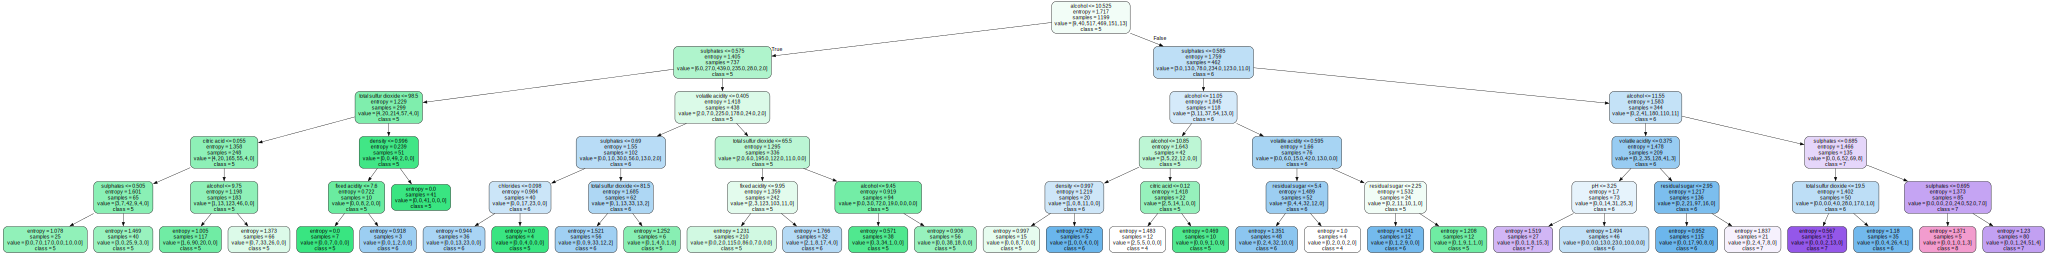

In [7]:

dot_data = export_graphviz(
    model_entropy,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_entropy", format="png")
display(graph)

## Функції

### evaluate_classification_metrics

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, matthews_corrcoef
)

#вивід метрик зважених
def evaluate_classification_metrics(y_test, y_g_test, y_e_test):
    # Обчислення основних метрик
    metrics = {
        'Accuracy': [accuracy_score(y_test, y_g_test), accuracy_score(y_test, y_e_test)],
        'Precision': [
            precision_score(y_test, y_g_test, average='weighted', zero_division=0),
            precision_score(y_test, y_e_test, average='weighted', zero_division=0)
        ],
        'Recall': [
            recall_score(y_test, y_g_test, average='weighted'),
            recall_score(y_test, y_e_test, average='weighted')
        ],
        'F1': [
            f1_score(y_test, y_g_test, average='weighted'),
            f1_score(y_test, y_e_test, average='weighted')
        ],
        'Balanced Accuracy': [
            balanced_accuracy_score(y_test, y_g_test),
            balanced_accuracy_score(y_test, y_e_test)
        ],
        'MCC': [
            matthews_corrcoef(y_test, y_g_test),
            matthews_corrcoef(y_test, y_e_test)
        ]
    }

    # Створюємо DataFrame з відповідними індексами для Gini та Entropy
    df_metrics = pd.DataFrame(metrics, index=['Gini', 'Entropy'])

    print(df_metrics)




### plot_model_comparison

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_model_comparison(model1, model2, model1_name, model2_name):
    # Передбачення для кожної моделі
    y_pred_1 = model1.predict(X_test)  # Для model1
    y_pred_2 = model2.predict(X_test)  # Для model2

    # Створюємо фігуру з двома колонками
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Виводимо перший графік (для model1)
    cm_model1 = confusion_matrix(y_test, y_pred_1, labels=model1.classes_)
    disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=model1.classes_)
    disp_model1.plot(ax=axes[0]) 
    axes[0].set_title(model1_name)

    # Виводимо другий графік (для model2)
    cm_model2 = confusion_matrix(y_test, y_pred_2, labels=model2.classes_)
    disp_model2 = ConfusionMatrixDisplay(confusion_matrix=cm_model2, display_labels=model2.classes_)
    disp_model2.plot(ax=axes[1]) 
    axes[1].set_title(model2_name)

    # Покажемо графіки
    plt.tight_layout() 
    plt.show()

    # Створимо графіки для правильних/помилкових класифікацій
    fig2, axes2 = plt.subplots(1, 2, figsize=(14, 7))

    # Графік для model1 - правильні і помилкові класифікації
    ax2 = axes2[0]
    labels = model1.classes_
    for i, label in enumerate(labels):
        real_class_count = cm_model1[i, :].sum()  # Всього зразків цього класу
        correct_class_count = cm_model1[i, i]    # Правильно класифіковані як цей клас
        other_class_count = real_class_count - correct_class_count  # Помилково класифіковані як інші

        ax2.bar(i, correct_class_count, color='green', label='Correct' if i == 0 else "")
        ax2.bar(i, other_class_count, bottom=correct_class_count, color='orange', label='Incorrect' if i == 0 else "")

    ax2.set_xticks(np.arange(len(labels)))
    ax2.set_xticklabels(labels)
    ax2.set_title(f'Classification per Class ({model1_name})')
    ax2.legend()

    # Графік для model2 - правильні і помилкові класифікації
    ax3 = axes2[1]
    labels = model2.classes_
    for i, label in enumerate(labels):
        real_class_count = cm_model2[i, :].sum()  # Всього зразків цього класу
        correct_class_count = cm_model2[i, i]    # Правильно класифіковані як цей клас
        other_class_count = real_class_count - correct_class_count  # Помилково класифіковані як інші

        ax3.bar(i, correct_class_count, color='green', label='Correct' if i == 0 else "")
        ax3.bar(i, other_class_count, bottom=correct_class_count, color='orange', label='Incorrect' if i == 0 else "")

    ax3.set_xticks(np.arange(len(labels)))
    ax3.set_xticklabels(labels)
    ax3.set_title(f'Classification per Class ({model2_name})')
    ax3.legend()

    # Покажемо графіки для правильних/помилкових класифікацій
    plt.tight_layout()
    plt.show()



## Результати моделей(7)

In [85]:
from sklearn.metrics import classification_report
target_names = [str(i) for i in model_gini.classes_]
print("GINI")
print()
print("Тренуваньна вибірка----------------------------------------------------------")
evaluate_classification_metrics(y_train, y_g_train, y_e_train)
print()
print(classification_report(y_train, y_g_train, target_names=target_names, zero_division=0))


print("\nТестова вибірка--------------------------------------------------------------")
evaluate_classification_metrics(y_test, y_g_test, y_e_test)
print()
print(classification_report(y_test, y_g_test, target_names=target_names, zero_division=0))

GINI

Тренуваньна вибірка----------------------------------------------------------
         Accuracy  Precision    Recall        F1  Balanced Accuracy       MCC
Gini     0.663053   0.659237  0.663053  0.640968           0.334807  0.461208
Entropy  0.658882   0.648069  0.658882  0.644462           0.395604  0.461072

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.03      0.05        40
           5       0.68      0.84      0.75       517
           6       0.66      0.58      0.62       469
           7       0.60      0.56      0.58       151
           8       0.00      0.00      0.00        13

    accuracy                           0.66      1199
   macro avg       0.49      0.33      0.33      1199
weighted avg       0.66      0.66      0.64      1199


Тестова вибірка--------------------------------------------------------------
         Accuracy  Precision  Recall        F1  Balanced Ac

max_depth:  5


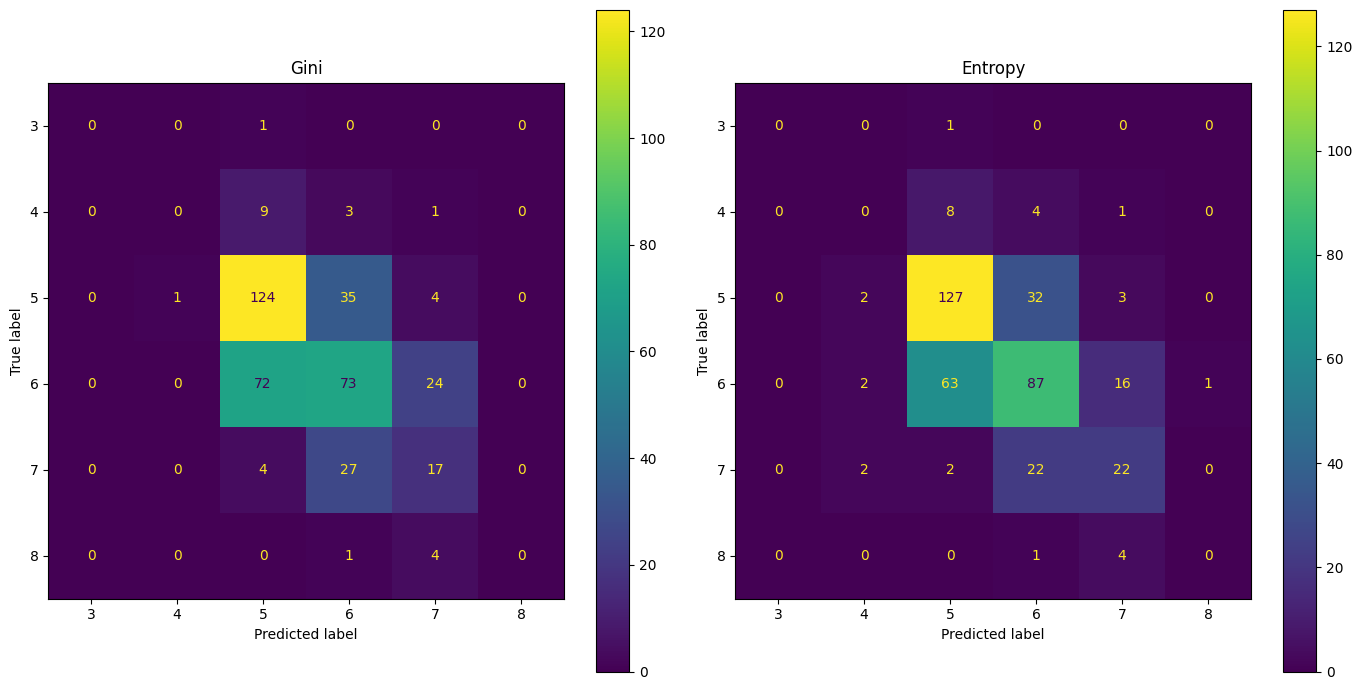

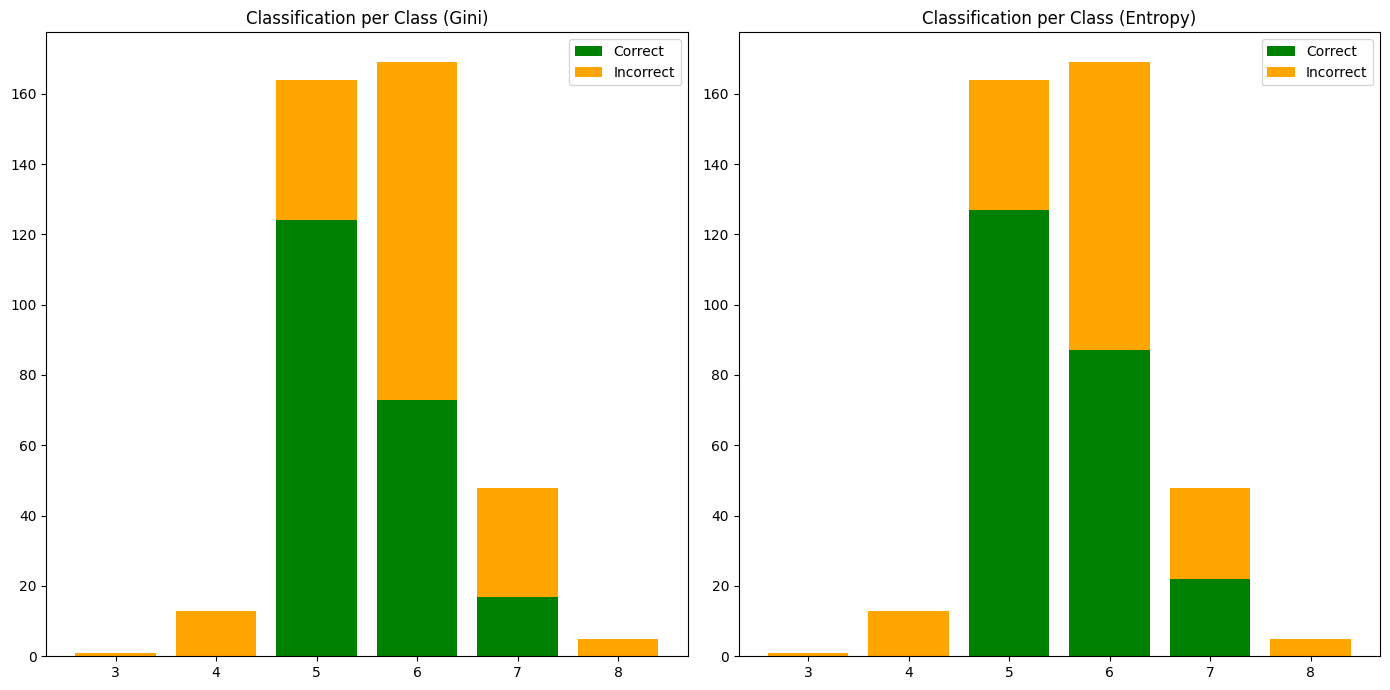

In [86]:
print("max_depth: ", depth)
plot_model_comparison(model_gini, model_entropy, "Gini", "Entropy")

## Пошук найкращих параметрів (8)

Найкращі параметри: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}
Найкращий score (на крос-валідації): 0.4034866600830254


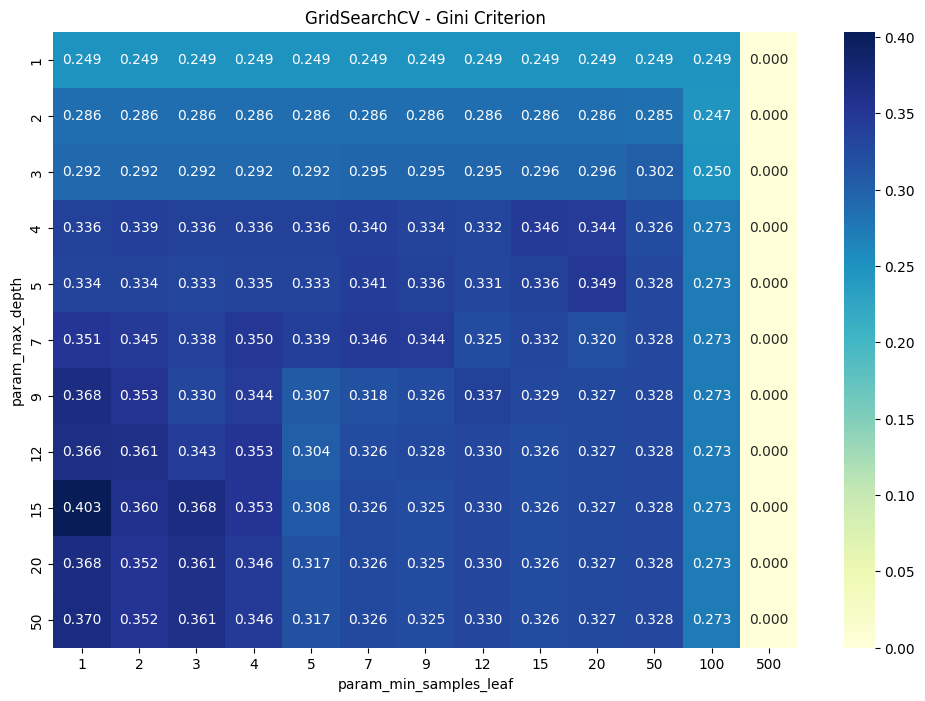

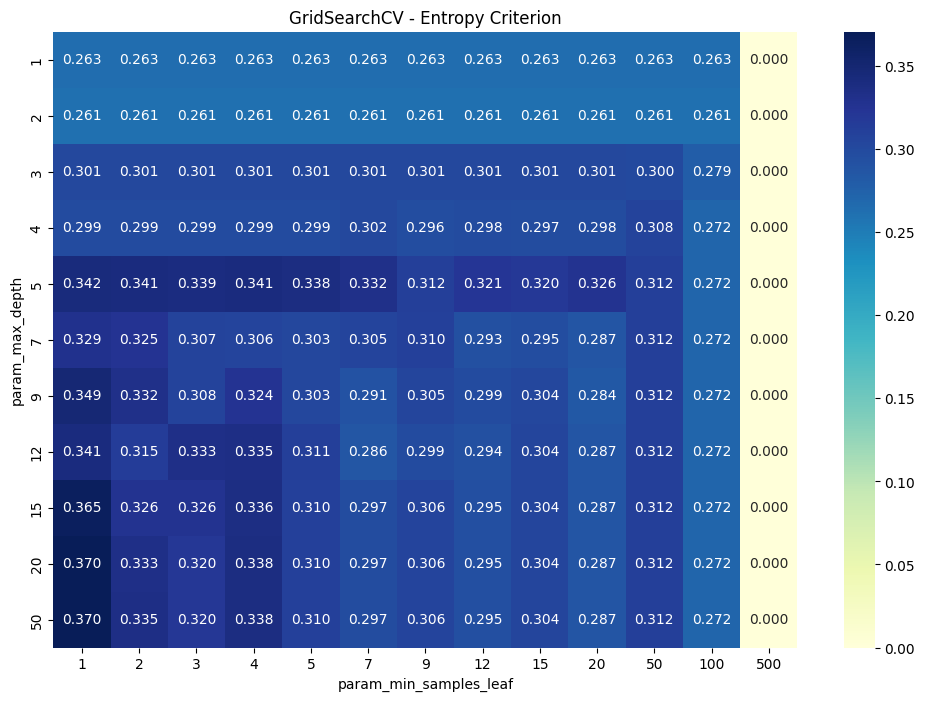

In [87]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Параметри для перебору
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 7, 9, 12, 15, 20, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9, 12, 15, 20, 50, 100, 500],
    'criterion': ['gini', 'entropy']
}

# Створення моделі та GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='matthews_corrcoef', n_jobs=-1)

# Навчання
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів
print("Найкращі параметри:", grid_search.best_params_)
print("Найкращий score (на крос-валідації):", grid_search.best_score_)
best_model = grid_search.best_estimator_

# Отримання результатів для кожної комбінації параметрів
results = grid_search.cv_results_

# Створення DataFrame для зручності
results_df = pd.DataFrame(results)

# Розбиття результатів по критеріях
gini_results_df = results_df[results_df['param_criterion'] == 'gini']
entropy_results_df = results_df[results_df['param_criterion'] == 'entropy']

# Графічне представлення результатів для Gini
plt.figure(figsize=(12, 8))
sns.heatmap(gini_results_df.pivot_table(values='mean_test_score', 
                                         index='param_max_depth', 
                                         columns='param_min_samples_leaf'), 
            cmap="YlGnBu", annot=True, fmt=".3f")
plt.title('GridSearchCV - Gini Criterion')
plt.show()

# Графічне представлення результатів для Entropy
plt.figure(figsize=(12, 8))
sns.heatmap(entropy_results_df.pivot_table(values='mean_test_score', 
                                           index='param_max_depth', 
                                           columns='param_min_samples_leaf'), 
            cmap="YlGnBu", annot=True, fmt=".3f")
plt.title('GridSearchCV - Entropy Criterion')
plt.show()

## *Порівняння найкращої моделі

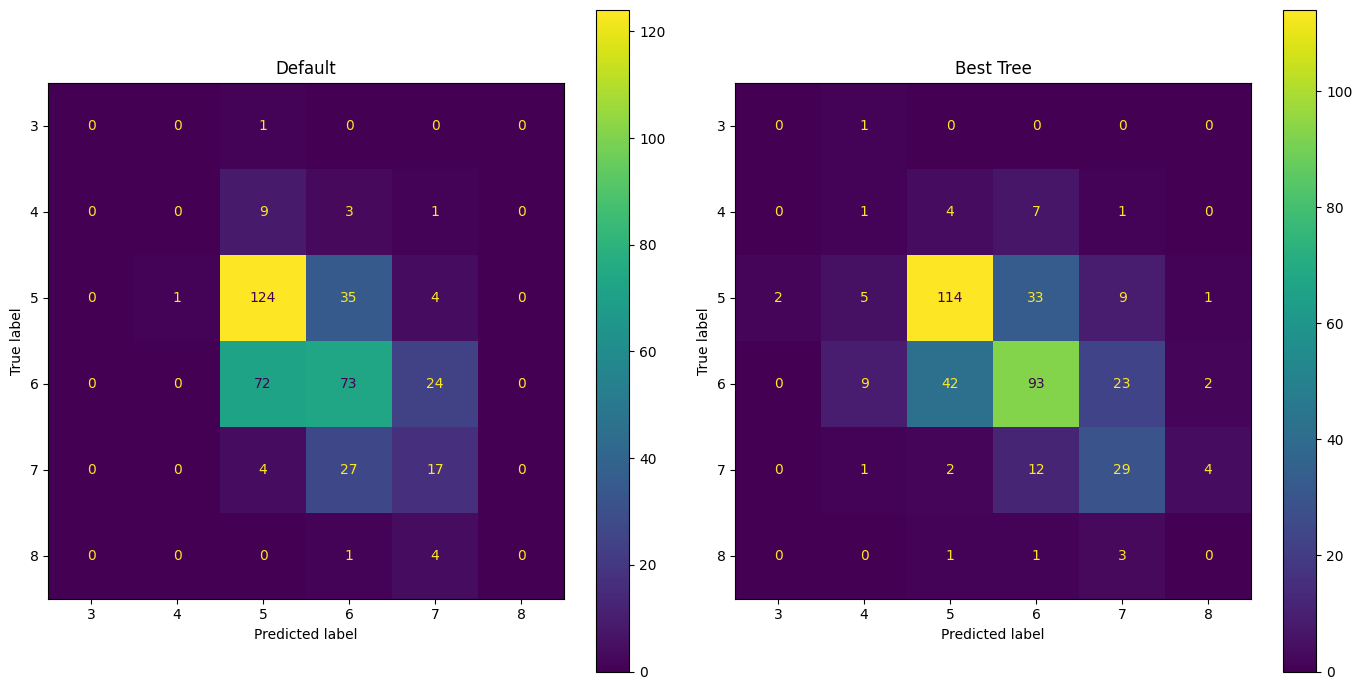

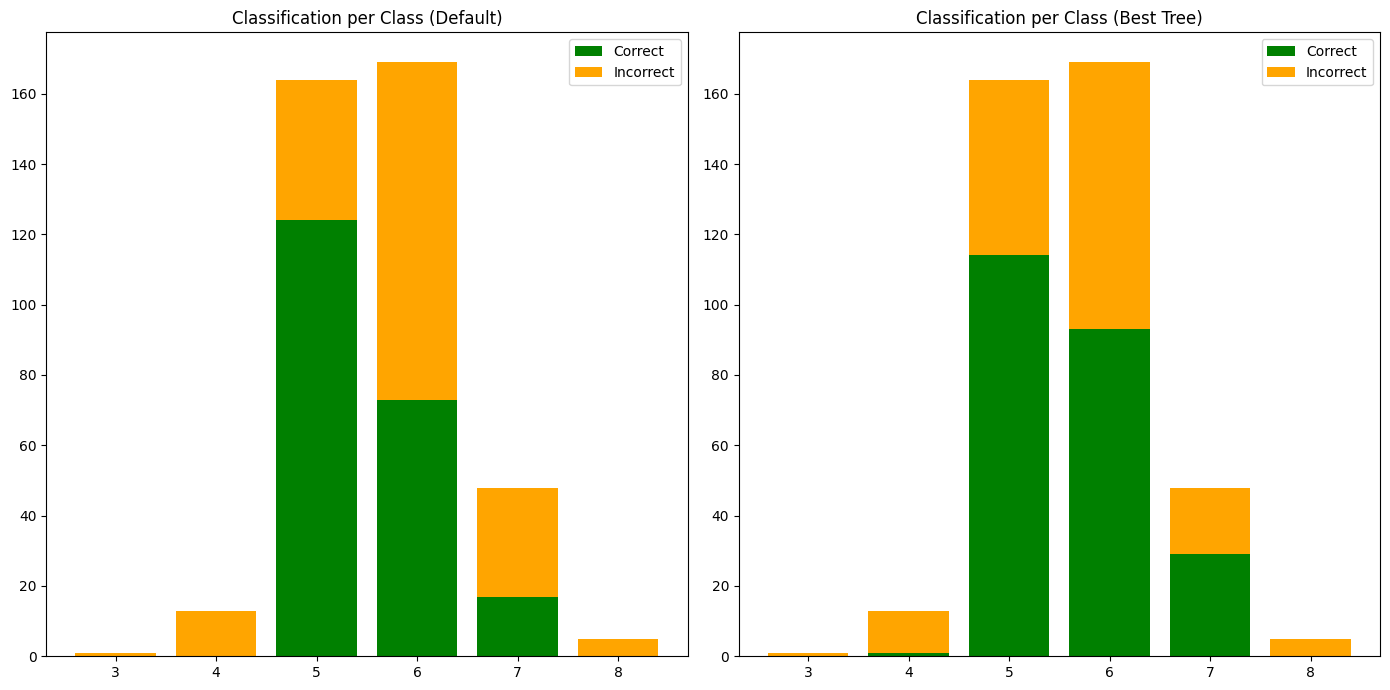

In [88]:
plot_model_comparison(model_gini, best_model, "Default", "Best Tree")

## Важливість атрибутів (9)

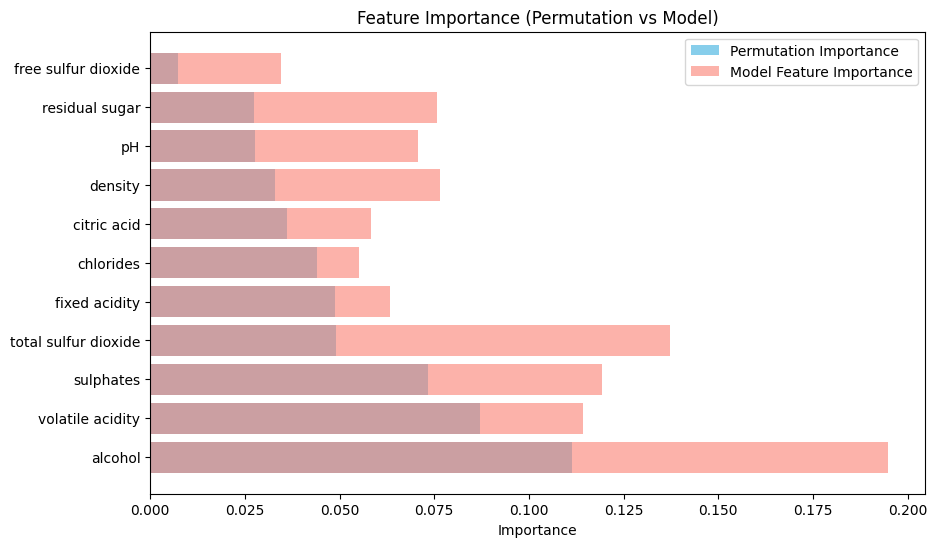

In [89]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Важливість ознак на основі перестановки
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
permutation_importance_mean = result.importances_mean

# Важливість ознак на основі feature_importances_
feature_importance = best_model.feature_importances_

# Створюємо DataFrame з іменами ознак та їх важливістю для обох методів
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': permutation_importance_mean,
    'Model Feature Importance': feature_importance
})

# Сортуємо ознаки за значенням важливості з обох методів
importance_df = importance_df.sort_values(by='Permutation Importance', ascending=False)

# Створюємо графік
plt.figure(figsize=(10, 6))

# Бар-графік для важливості за перестановкою
plt.barh(importance_df['Feature'], importance_df['Permutation Importance'], color='skyblue', label='Permutation Importance')

# Бар-графік для важливості за model.feature_importances_
plt.barh(importance_df['Feature'], importance_df['Model Feature Importance'], color='salmon', alpha=0.6, label='Model Feature Importance')

# Додаємо підписи
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation vs Model)')
plt.legend()
plt.show()

## *Forest

In [90]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [20, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Random Forest
rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='matthews_corrcoef',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Найкращі параметри:", grid_search.best_params_)
print("Максимальний MCC:", grid_search.best_score_)

best_model_forest = grid_search.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Найкращі параметри: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Максимальний MCC: 0.5052788918148837


## *Порівняння tree & forest

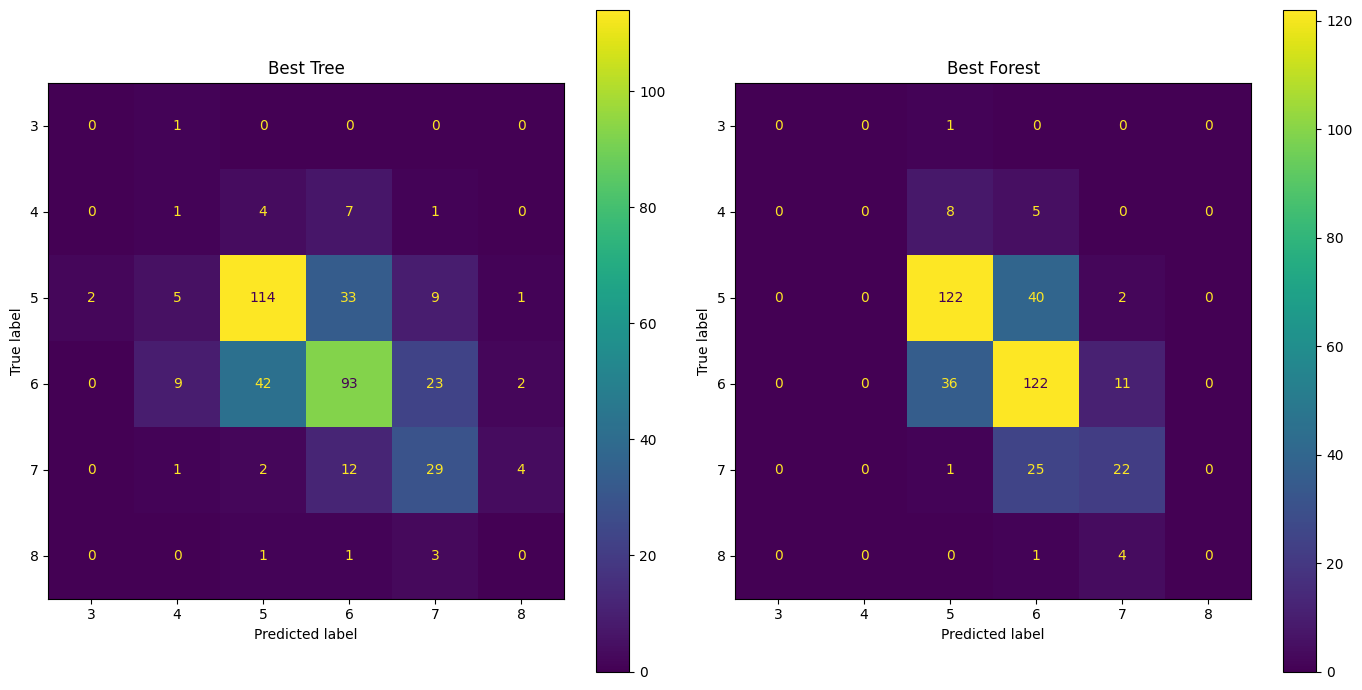

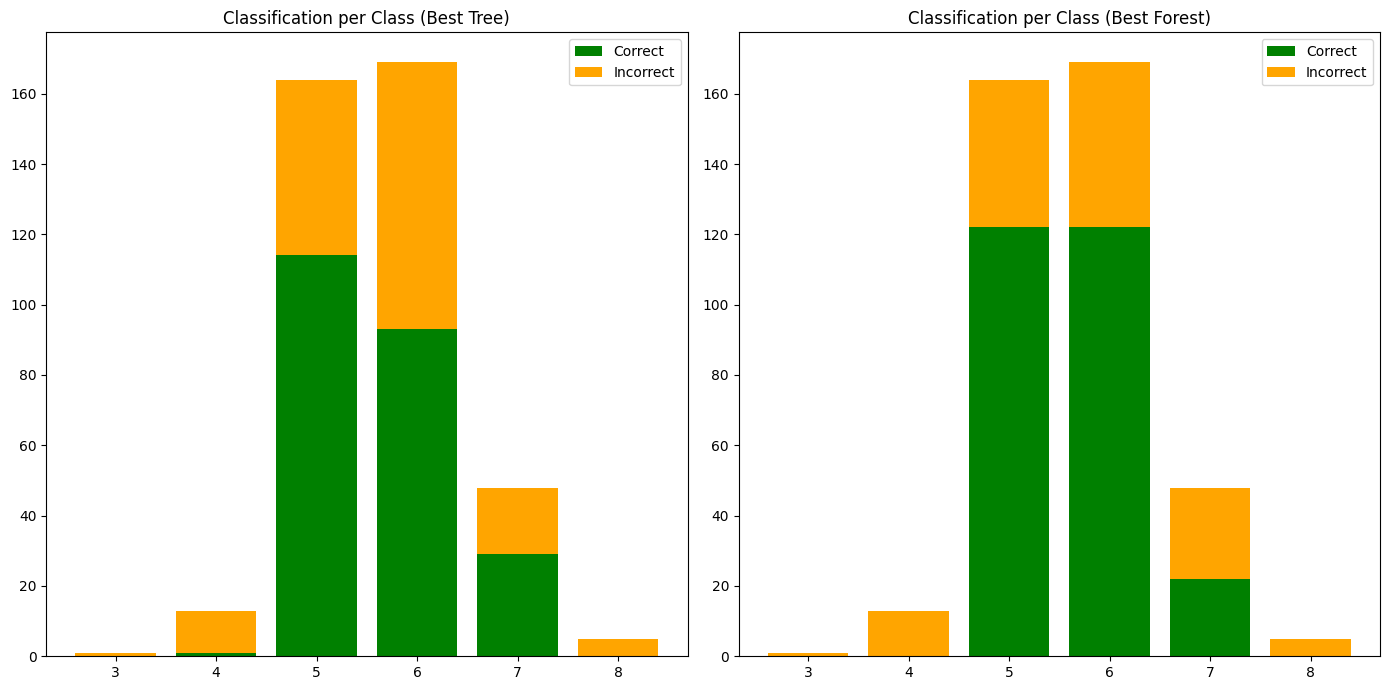

In [91]:
plot_model_comparison(best_model, best_model_forest, "Best Tree", "Best Forest")